# Исследование объявлений о продаже квартир 

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

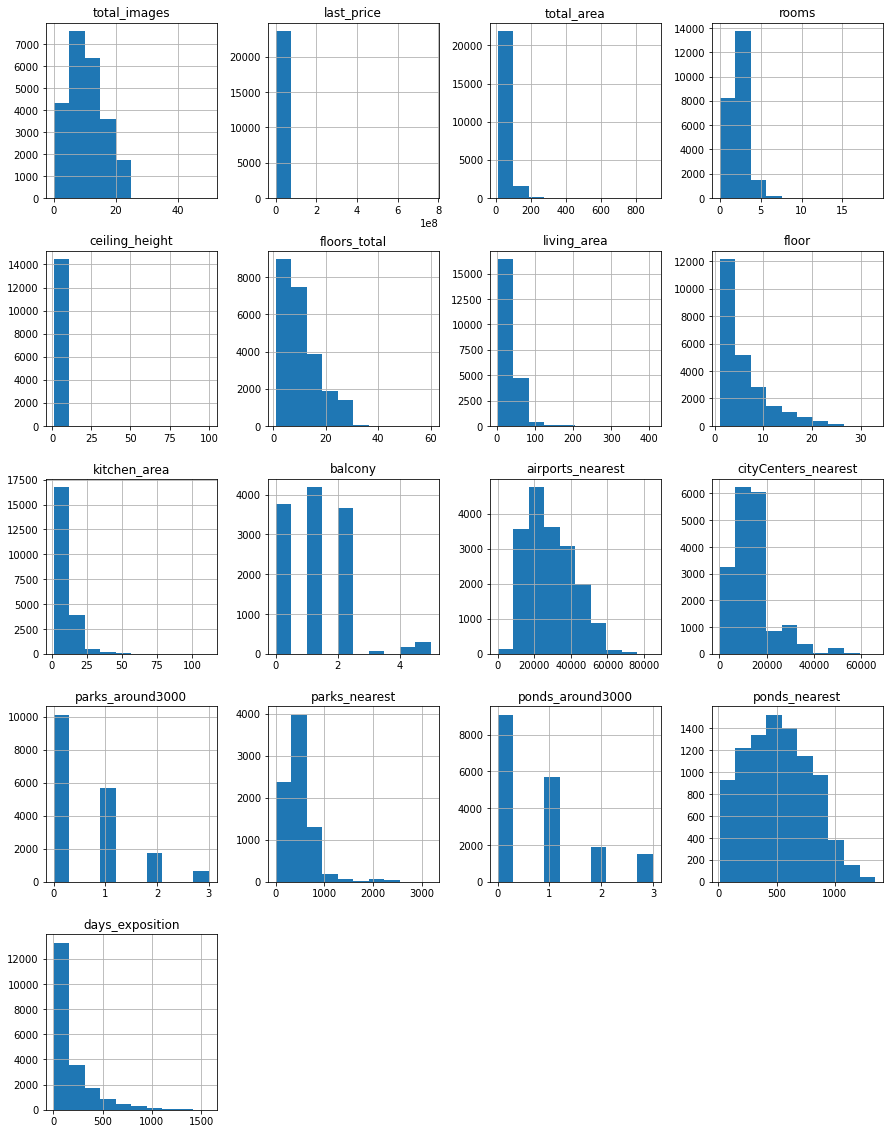

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv ('/datasets/real_estate_data.csv', sep='\t')
display (data.head())
data.hist(figsize=(15, 20))

In [2]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Вывод: Всего у нас 23699 записей. Для целого ряда столбцов есть пропущенные значения и некорректный тип данных. По ряду признаков есть аномальные значения.

In [3]:
data [data.duplicated ()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


### Предобработка данных

Смотрим перечень названий столбцов:

In [4]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Определяем суммарное количество пропусков:

In [5]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пустые значения свидетельствуют, что для некоторых столбцов доступна не вся информация. Причины могут быть разные: ceiling_height (высота потолков (м)) - не указали, можно заменить медийными значениями; floors_total (всего этажей в доме) - не указали, мало пропусков можно удалить; living_area (жилая площадь в квадратных метрах (м²)) - не указали, заменим Nan на 0; is_apartment (апартаменты (булев тип)) - заменим nan на False; kitchen_area (площадь кухни в квадратных метрах (м²)) - заменим Nan на 0;balcony (число балконов) - наверное нет балконов и заменяем на 0; locality_name (название населённого пункта) - не указали, мало пропусков можно удалить; airports_nearest (расстояние до ближайшего аэропорта в метрах (м)) - ;cityCenters_nearest (расстояние до центра города (м)) - не указали, оставляем так; parks_around3000  (число парков в радиусе 3 км) - не указали, оставляем так; parks_nearest (расстояние до ближайшего парка (м)) - не указали, оставляем так; ponds_around3000 (число водоёмов в радиусе 3 км) - не указали, оставляем так; ponds_nearest (расстояние до ближайшего водоёма (м)) - не указали, оставляем так; days_exposition (сколько дней было размещено объявление (от публикации до снятия)) - вычислим последний день публикации и заполним дни публикации зная дату публикации.



Получаем количество уникальных значений в столбцах:

In [6]:
data.nunique()

total_images              38
last_price              2978
total_area              2182
first_day_exposition    1491
rooms                     17
ceiling_height           183
floors_total              36
living_area             1782
floor                     33
is_apartment               2
studio                     2
open_plan                  2
kitchen_area             971
balcony                    6
locality_name            364
airports_nearest        8275
cityCenters_nearest     7642
parks_around3000           4
parks_nearest            995
ponds_around3000           4
ponds_nearest           1096
days_exposition         1141
dtype: int64

Проверяем столбцы их уникальных значений:

In [7]:
print (data['total_images'].unique())
print (data['last_price'].unique())
print (data['total_area'].unique())
print (data['first_day_exposition'].unique())
print (data['rooms'].unique())
print (data['ceiling_height'].unique())
print (data['floors_total'].unique())
print (data['living_area'].unique())
print (data['floor'].unique())
print (data['is_apartment'].unique())
print (data['studio'].unique())
print (data['open_plan'].unique())
print (data['kitchen_area'].unique())
print (data['balcony'].unique())
print (data['locality_name'].unique())
print (data['airports_nearest'].unique())
print (data['cityCenters_nearest'].unique())
print (data['parks_around3000'].unique())
print (data['parks_nearest'].unique())
print (data['ponds_around3000'].unique())
print (data['ponds_nearest'].unique())
print (data['days_exposition'].unique())


[20  7 10  0  2  6  5 18  9  1 16 11  8 12 13  3 15 17 14 19 32  4 35 39
 23 21 27 30 24 25 28 31 22 29 26 50 42 37]
[13000000.  3350000.  5196000. ...  6151120. 21400000. 11475000.]
[108.    40.4   56.   ...  66.86 133.81  76.75]
['2019-03-07T00:00:00' '2018-12-04T00:00:00' '2015-08-20T00:00:00' ...
 '2014-12-29T00:00:00' '2016-09-12T00:00:00' '2015-07-19T00:00:00']
[ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]
[  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6
   2.92   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53
   2.74   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82
   3.54   3.53   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9
   3.18   3.35

In [8]:
data['balcony'] = data['balcony'].fillna(0)
data.dropna(subset=['locality_name', 'floors_total'], inplace=True)
data.rename(columns = {'cityCenters_nearest':'city_centers_nearest'}, inplace=True)
data['is_apartment'].fillna(False, inplace=True)
data['ceiling_height'] = data['ceiling_height'].fillna(data.groupby(['rooms','studio','is_apartment'])['ceiling_height'].transform('median'))

Чтобы не было путоницы:"посёлок" переменуем "поселок".

In [9]:
data.locality_name = data.locality_name.str.replace('ё', 'е')
data.locality_name = data.locality_name.str.replace('поселок городского типа', 'поселок')
data.locality_name = data.locality_name.str.replace('городской поселок', 'поселок')

sorted_locality_name = set(data['locality_name'].unique())
display(sorted_locality_name) 

{'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалево',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'деревня Агалатово',
 'деревня Аро',
 'деревня Батово',
 'деревня Бегуницы',
 'деревня Белогорка',
 'деревня Большая Вруда',
 'деревня Большая Пустомержа',
 'деревня Большие Колпаны',
 'деревня Большое Рейзино',
 'деревня Большой Сабск',
 'деревня Бор',
 'деревня Борисова Грива',
 'деревня Ваганово',
 'деревня Вартемяги',
 'деревня Вахнова Кара',
 'деревня Выскатка',
 'деревня Гарболово',
 'деревня Глинка',
 '

У всех квартир с 0 комнат и не-студий указана living_area. Получается 1 комната там есть, поменяем 0 на 1 и не будем путаться.

In [10]:
data.loc[(data['rooms'] == 0) & (data['studio']==False), 'rooms'] = 1

Найдем коэффициент жилой площади и коэффициент кухни ко всей площади:

In [11]:
liv_coef = data['living_area'].median() / data['total_area'].median()
print (liv_coef)
kitch_coef = data['kitchen_area'].median() / data['total_area'].median()
print (kitch_coef)

0.5769230769230769
0.175


Нулевых значений в living_area и kitchen_area нет, поэтому для удобства заменим Nan на 0.

In [12]:
data['living_area'].fillna(0, inplace=True)
data['living_area_new'] = data.apply(lambda x:x['total_area'] * liv_coef if x['living_area'] == 0 else x['living_area'], axis = 1)
data['living_area'] = data['living_area_new']
data.drop(['living_area_new'], axis='columns', inplace=True)

data['kitchen_area'].fillna(0, inplace=True)
kitch_coef = data['kitchen_area'].median() / data['total_area'].median()
data['kitchen_area_new'] = data.apply(lambda x:x['total_area'] * kitch_coef if x['kitchen_area'] == 0 else x['kitchen_area'], axis = 1)
data['kitchen_area'] = data['kitchen_area_new']
data.drop(['kitchen_area_new'], axis='columns', inplace=True)

Вычислим последний день публикации и заполним дни публикации зная дату публикации:

<AxesSubplot:xlabel='days_exposition'>

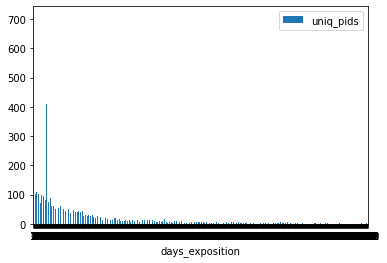

In [13]:
from datetime import datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])
data['days_exposition'].fillna(0, inplace=True)
data['days_exposition'] = data['days_exposition'].astype('int64')

def date(row):
    return row['first_day_exposition'] + pd.Timedelta(days = row['days_exposition'])
data['last_day_exposition'] = data.apply(date, axis = 1)

max_date = data['last_day_exposition'].max()
for row in data:
    if data['days_exposition'] is None:
        data['days_exposition'] = max_date - data['first_day_exposition']

data.groupby('days_exposition').first_day_exposition.nunique().to_frame('uniq_pids').plot.bar(rot=0)

In [14]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              2
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition             0
last_day_exposition         0
dtype: int64

Рассмотрим типы данных в каждом столбце:

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23563 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

last_price (цена на момент снятия с публикации), floors_total (всего этажей в доме), balcony (число балконов) - float64, но должен быть int64. 


In [16]:
data['last_price']= data['last_price'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int') 
data['parks_around3000'] = data['parks_around3000'].fillna(value=0).astype('int')
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0).astype('int')

Округляем значения до 2 цифр после запятой:

In [17]:
for column in ['total_area', 'ceiling_height', 'living_area', 'kitchen_area']:
    data[column] = data[data[column].notnull()][column].round(2)

### Новые столбцы

Добавим этажи: первый, последний и другой.

In [18]:
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
data['floor_category'] = data.apply(floor_category, axis = 1)

Добавим цену квадратного метра.

In [19]:
data['price_per_meter'] = data['last_price'] / data['total_area']
data['price_per_meter'] = data['price_per_meter'].round(decimals=2)

Добавим столбцы дни недели, месяц, год публикации объявления.

In [20]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

#dict_of_weekdays = {1: 'понедельник', 2: 'вторник', 3: 'среда', 4: 'четверг', 5: 'пятница', 6: 'суббота', 7: 'воскресенье'}
#data['weekday_exposition'] = data['weekday_exposition'].map(dict_of_weekdays)

Добавим столбцы отношения жилой площади и площади кухни ко всей площади:

In [21]:
data['living_ratio_total'] = data['living_area'] / data['total_area']
data['kitchen_ratio_total'] = data['kitchen_area'] / data['total_area']

Добавим расстояние до центра города в километрах.

In [22]:
data['center_km'] = data['city_centers_nearest'] / 1000
data['center_km'] = data['center_km'].fillna(value=0).astype(int)

In [23]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,last_day_exposition,floor_category,price_per_meter,weekday_exposition,month_exposition,year_exposition,living_ratio_total,kitchen_ratio_total,center_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.00,8,False,...,0,2019-03-07,другой,120370.37,3,3,2019,0.472222,0.231481,16
1,7,3350000,40.4,2018-12-04,1,2.64,11,18.60,1,False,...,81,2019-02-23,первый,82920.79,1,12,2018,0.460396,0.272277,18
2,10,5196000,56.0,2015-08-20,2,2.60,5,34.30,4,False,...,558,2017-02-28,другой,92785.71,3,8,2015,0.612500,0.148214,13
3,0,64900000,159.0,2015-07-24,3,2.65,14,91.73,9,False,...,424,2016-09-20,другой,408176.10,4,7,2015,0.576918,0.173082,6
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.00,13,False,...,121,2018-10-18,другой,100000.00,1,6,2018,0.320000,0.410000,8


### Исследовательский анализ данных

Анализ общей площади:

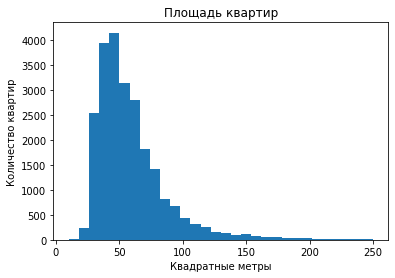

Наибольшие по площади варианты:
19540    900.0
12859    631.2
3117     631.0
15651    618.0
5358     590.0
4237     517.0
8018     507.0
15016    500.0
5893     500.0
12401    495.0
Name: total_area, dtype: float64


'Общая площадь'

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

In [24]:
plt.hist(data['total_area'], bins=30, range=(10,250))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
total_area_max = data['total_area'].sort_values(ascending=False).head(10)
print(f'Наибольшие по площади варианты:\n{total_area_max}')
display('Общая площадь',data['total_area'].describe())

Анализ жилой площади:

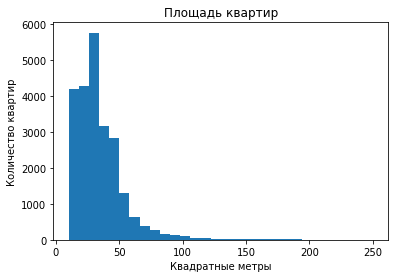

Наибольшие по площади варианты:
19540    409.70
5358     409.00
3117     364.04
12401    347.50
4237     332.00
12859    322.30
660      312.50
8018     301.50
14088    300.00
5893     288.46
Name: living_area, dtype: float64


'Жилая площадь'

count    23565.000000
mean        34.621104
std         22.399830
min          2.000000
25%         19.000000
50%         30.000000
75%         42.120000
max        409.700000
Name: living_area, dtype: float64

In [25]:
plt.hist(data['living_area'], bins=30, range=(10,250))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
living_area_max = data['living_area'].sort_values(ascending=False).head(10)
print(f'Наибольшие по площади варианты:\n{living_area_max}')
display('Жилая площадь',data['living_area'].describe())

Анализ площади кухни:

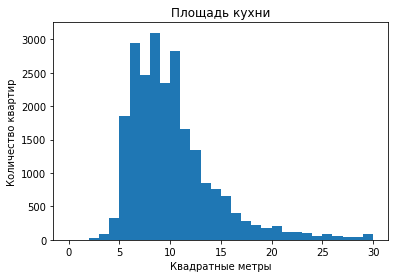

Наибольшие по площади кухни варианты:
19540    112.00
20215    107.00
2489     100.70
5358     100.00
16239     93.20
16797     93.00
10867     87.20
15016     86.54
9826      85.52
492       77.00
Name: kitchen_area, dtype: float64


'Площадь кухни'

count    23565.000000
mean        10.489242
std          6.029696
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [26]:
plt.hist(data['kitchen_area'], bins=30, range=(0,30))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
kitchen_area_max = data['kitchen_area'].sort_values(ascending=False).head(10)
print(f'Наибольшие по площади кухни варианты:\n{kitchen_area_max}')
display('Площадь кухни',data['kitchen_area'].describe())

Анализ цены объекта:

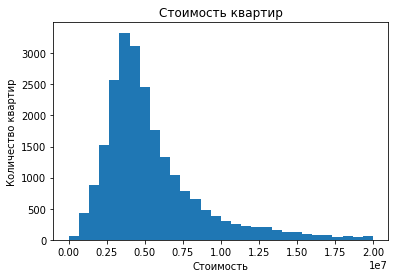

Наибольшие по цене варианты:
12971    763000000
19540    420000000
14706    401300000
1436     330000000
15651    300000000
22831    289238400
16461    245000000
13749    240000000
5893     230000000
8900     190870000
Name: last_price, dtype: int64


'Цена объекта'

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [27]:
plt.hist(data['last_price'], bins=30, range=(0,20000000))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()
last_price_max = data['last_price'].sort_values(ascending=False).head(10)
print(f'Наибольшие по цене варианты:\n{last_price_max}')
display('Цена объекта',data['last_price'].describe())

Анализ количества комнат:

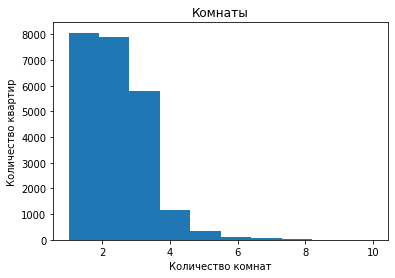

Наибольшие по числу комнат варианты:
14498    19
18848    16
5358     15
20829    14
866      14
19540    12
648      11
9688     11
18891    10
18119    10
Name: rooms, dtype: int64


'Число комнат'

count    23565.000000
mean         2.073159
std          1.074935
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [28]:
plt.hist(data['rooms'], bins=10, range=(1,10))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
rooms_max = data['rooms'].sort_values(ascending=False).head(10)
print(f'Наибольшие по числу комнат варианты:\n{rooms_max}')
display('Число комнат',data['rooms'].describe())

Анализ высоты потолков:


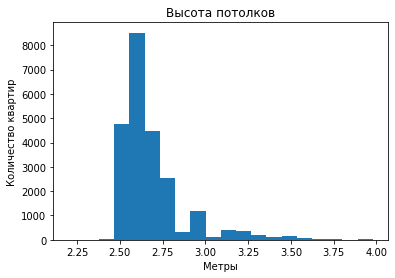

Наибольшие по высоте потолков варианты:
1977     3.98
2176     3.95
15119    3.95
12199    3.95
2676     3.95
4917     3.95
19852    3.95
20197    3.95
16466    3.95
13982    3.93
Name: ceiling_height, dtype: float64


'Высота потолков'

count    23563.000000
mean         2.722826
std          0.992460
min          1.000000
25%          2.600000
50%          2.640000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [29]:
plt.hist(data.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=20)
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
ceiling_height_max = data.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'].sort_values(ascending=False).head(10)
print(f'Наибольшие по высоте потолков варианты:\n{ceiling_height_max}')
display('Высота потолков',data['ceiling_height'].describe())

Анализ этажа квартиры:

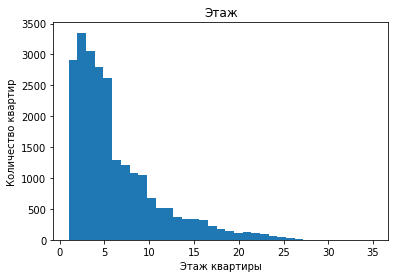

Наибольшие по числу комнат варианты:
18218    33
11575    32
18629    31
1917     30
11079    29
397      28
12888    27
16644    27
23292    27
4091     27
Name: floor, dtype: int64


'Этаж объекта'

count    23565.000000
mean         5.878124
std          4.871485
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [30]:
plt.hist(data['floor'], bins=35, range=(1,35))
plt.title('Этаж')
plt.xlabel('Этаж квартиры')
plt.ylabel('Количество квартир')
plt.show()
floor_max = data['floor'].sort_values(ascending=False).head(10)
print(f'Наибольшие по числу комнат варианты:\n{floor_max}')
display('Этаж объекта',data['floor'].describe())

Анализ типа этажа квартиры («первый», «последний», «другой»):

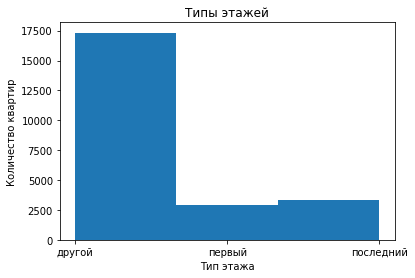

In [31]:
plt.hist(data['floor_category'], bins=3, range=(0,2))
plt.title('Типы этажей')
plt.xlabel('Тип этажа')
plt.ylabel('Количество квартир')
plt.show()

Анализ общего количество этажей в доме:

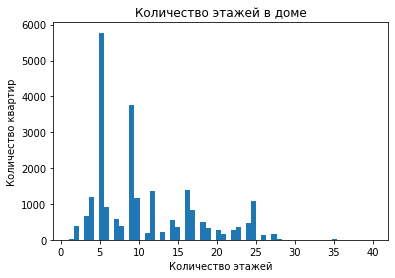

Наибольшие по числу этажей в доме:
2253     60
16731    52
16934    37
5807     36
11079    36
397      36
13975    35
2966     35
9186     35
1917     35
Name: floors_total, dtype: int64


'Количество этажей в доме'

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [32]:
plt.hist(data['floors_total'], bins=60, range=(1,40))
plt.title('Количество этажей в доме')
plt.xlabel('Количество этажей')
plt.ylabel('Количество квартир')
plt.show()
floors_total_max = data['floors_total'].sort_values(ascending=False).head(10)
print(f'Наибольшие по числу этажей в доме:\n{floors_total_max}')
display('Количество этажей в доме',data['floors_total'].describe())

Анализ расстояния до центра города:

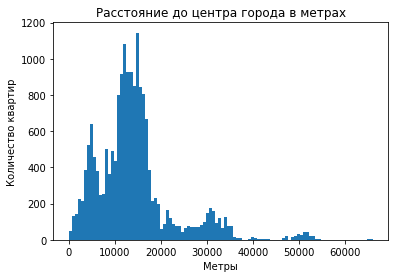

Наибольшие по расстоянию до центра города в метрах:
9640     65968.0
5340     65952.0
577      65764.0
20746    65105.0
5218     64857.0
18884    62706.0
2974     62454.0
16569    61495.0
23123    60223.0
4441     59626.0
Name: city_centers_nearest, dtype: float64


'Расстояние до центра города в метрах'

count    18064.000000
mean     14192.656056
std       8613.348153
min        181.000000
25%       9238.000000
50%      13096.500000
75%      16285.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

In [33]:
plt.hist(data['city_centers_nearest'], bins=100, range=(1,66000))
plt.title('Расстояние до центра города в метрах')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
city_centers_nearest_max = data['city_centers_nearest'].sort_values(ascending=False).head(10)
print(f'Наибольшие по расстоянию до центра города в метрах:\n{city_centers_nearest_max}')
display('Расстояние до центра города в метрах',data['city_centers_nearest'].describe())

Анализ расстояния до ближайшего аэропорта:

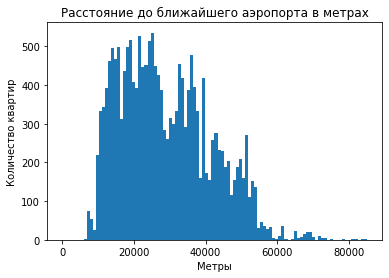

Наибольшие по расстоянию до ближайшего аэропорта в метрах:
9640     84869.0
5340     84853.0
577      84665.0
20746    84006.0
5218     83758.0
18884    81607.0
2974     81355.0
4441     78527.0
939      75646.0
376      73827.0
Name: airports_nearest, dtype: float64


'Расстояние до ближайшего аэропорта в метрах'

count    18041.000000
mean     28797.082701
std      12632.499735
min          0.000000
25%      18565.000000
50%      26757.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [34]:
plt.hist(data['airports_nearest'], bins=100, range=(1,85000))
plt.title('Расстояние до ближайшего аэропорта в метрах')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
airports_nearest_max = data['airports_nearest'].sort_values(ascending=False).head(10)
print(f'Наибольшие по расстоянию до ближайшего аэропорта в метрах:\n{airports_nearest_max}')
display('Расстояние до ближайшего аэропорта в метрах',data['airports_nearest'].describe())

Анализ расстояния до ближайшего парка:

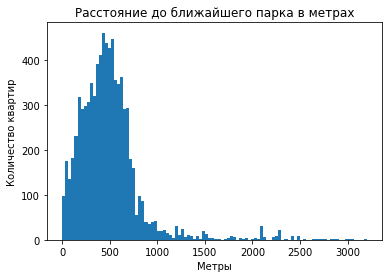

Наибольшие по расстоянию до ближайшего парка в метрах:
10959    3190.0
19430    3190.0
1590     3064.0
19208    3013.0
23080    2984.0
2659     2905.0
1860     2888.0
7855     2880.0
3865     2847.0
22003    2768.0
Name: parks_nearest, dtype: float64


'Расстояние до ближайшего парка в метрах'

count    8030.000000
mean      490.580448
std       341.572956
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [35]:
plt.hist(data['parks_nearest'], bins=100, range=(1,3200))
plt.title('Расстояние до ближайшего парка в метрах')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
parks_nearest_max = data['parks_nearest'].sort_values(ascending=False).head(10)
print(f'Наибольшие по расстоянию до ближайшего парка в метрах:\n{parks_nearest_max}')
display('Расстояние до ближайшего парка в метрах',data['parks_nearest'].describe())

Анализ публикации объявления:

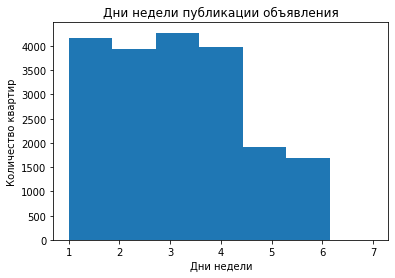

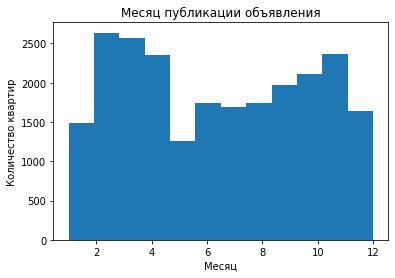

In [36]:
plt.hist(data['weekday_exposition'], bins=7, range=(1,7))
plt.title('Дни недели публикации объявления')
plt.xlabel('Дни недели')
plt.ylabel('Количество квартир')
plt.show()
plt.hist(data['month_exposition'], bins=12, range=(1,12))
plt.title('Месяц публикации объявления')
plt.xlabel('Месяц')
plt.ylabel('Количество квартир')
plt.show()

Вывод: общая площадь большинства квартир в диапозоне 30-80 кв.м.; жилая площадь 10-50 кв.м.; площадь кухни 5-15 кв.м; цена объекта в основном 1.5-7.5 миллионов; количество комнат 1-4; высота потолков 2.5-3 метра; этаж квартиры в диапозоне 1-5; тип этажа квартиры преобладает «другой»; общее количество этажей в доме: больше всего 5-ти и 9-ти этажных домов; расстояние до центра города в метрах 5-20 км; расстояние до ближайшего аэропорта 10-50 км; расстояние до ближайшего парка состовляет от 0 до 750 метров; публикации объявления в основном понедельник, вторник, среда, четверг и февраль, март, апрель, ноябрь. В воскресенье публикаций нет.

Изучаем, зависит ли цена от общей площади:

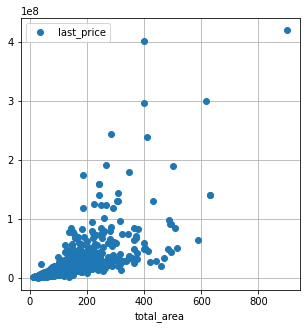

0.6536213939252808

In [37]:
data.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()
data['total_area'].corr(data['last_price'])

Изучаем, зависит ли цена от жилой площади:

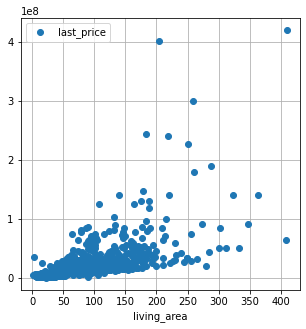

0.585783004561039

In [38]:
data.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()
data['living_area'].corr(data['last_price'])

Изучаем, зависит ли цена от площади кухни:

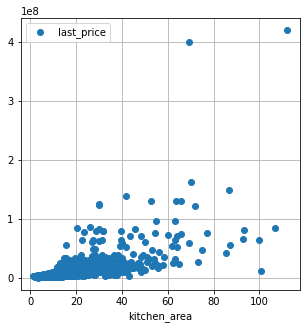

0.5140364113009086

In [39]:
data.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()
data['kitchen_area'].corr(data['last_price'])

Вывод: Чем больше площадь, тем выше стоимость. Площадь кухни меньше влияет на повышение цены, чем жилая площадь.   


Изучаем, зависит ли цена от количества комнат:

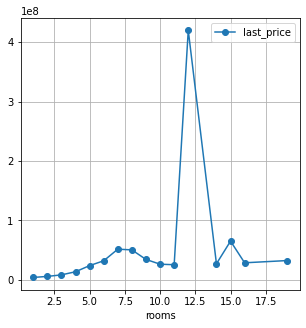

0.36386428851838054

In [40]:
data.query('rooms > 0').pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()
data['rooms'].corr(data['last_price'])

Вывод: Число комнат влияет на цену: с увиличение комнат от 1 до 7 - цена плавно увеличевается, потом плавно снижается до 11 комнат, квартиры с 12 комнатами самые дорогие.

Изучаем, зависит ли цена от этажа, на котором расположена квартира (первый, последний, другой):

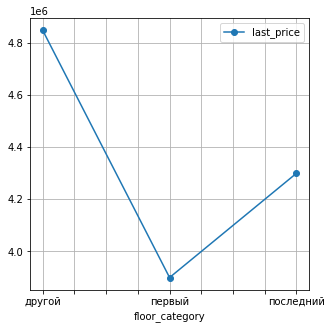

0.026841775356835604

In [41]:
data.pivot_table(index='floor_category', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()
data['floor'].corr(data['last_price'])

Вывод: Квартиры на первом этаже самые дешовые, средняя цена последний этаж, высокая другие этажи.

Изучаем, зависит ли цена от даты размещения (день недели, месяц, год):

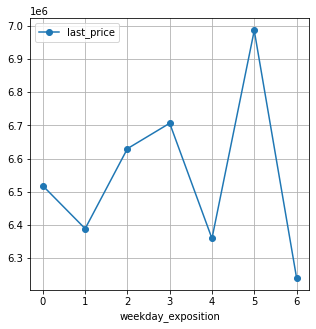

0.0013569211122710745

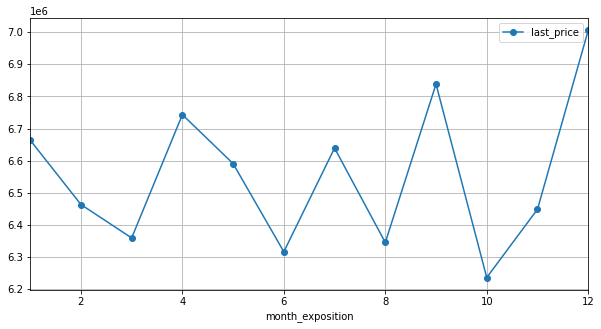

0.0027259571647347564

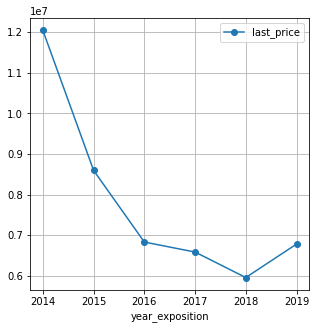

-0.04286415271361106

In [43]:
data.pivot_table(index='weekday_exposition', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()
display (data['weekday_exposition'].corr(data['last_price']))
data.pivot_table(index='month_exposition', values='last_price').plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
plt.show()
display (data['month_exposition'].corr(data['last_price']))
data.pivot_table(index='year_exposition', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()
display (data['year_exposition'].corr(data['last_price']))

Вывод: В субботу размещают самые дорогие варианты квартир, самые дешевые в пятницу. В течение года самые дорогие варианты квартир - январь, апрель, июль, сентябрь, декабрь, остольные месяцы дешевые. Объявления с 2014 года самые дорогие варианты, постипенное снижение к самой низкой цены 2018 год, в 2019 небольшой рост.

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [46]:
city_ten = data['locality_name'].value_counts().head(10)
city_sm_price = data.query('locality_name in (@city_ten.index)').pivot_table(values='price_per_meter', index='locality_name')
city_sm_price = city_sm_price.astype(int)
city_sm_price.sort_values('price_per_meter', ascending=False)

,price_per_meter
locality_name,
Санкт-Петербург,114868
Пушкин,103125
деревня Кудрово,92473
поселок Парголово,90175
поселок Мурино,85629
поселок Шушары,78551
Колпино,75424
Гатчина,68746
Всеволожск,68654


Вывод: Наибольшая средняя стоимость квадратного метра в Санкт-Петербурге. Затем идёт Пушкин, потом идут районы, фактически являющиеся Санкт-Петербургом и непосредственно к нему примыкают. Из топ-10 наименьшая стоимость в Гатчине и Всеволожске, из которых далеко ехать до Санкт-Петербурга, а также неболшой по численности населения Выборг, расположенный на большом расстоянии от Санкт-Петербурга.

Анализ квартир Санкт-Петербурга, как стоимость объектов зависит от расстояния до центра города.

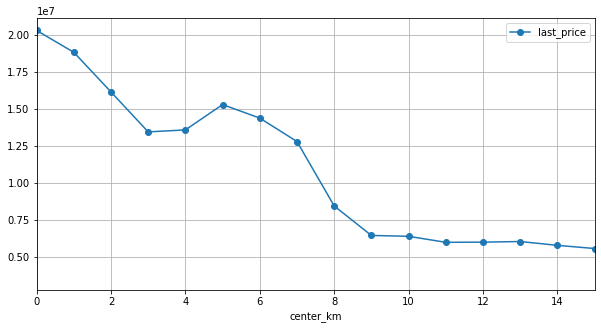

In [49]:
data.query('locality_name == "Санкт-Петербург"').pivot_table(index='center_km', values='last_price').plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
plt.show()

Вывод: Чем дальше от центра квартиры дешевле, но в диапозоне 3-7 км от центра небольшое повышение цены, наверное это спальные районы с наличием парков.

### Общий вывод

Факторы, влияющие на стоимость:
- на стоимость больше влияет площадь квартиры, нежели число комнат. 
- первый этаж значительно дешевле остальных вариантов. Также стоимость квартиры на последнем этаже ниже, чем на остальных, кроме первого.
- Чем больше площадь, тем выше стоимость. Площадь кухни меньше влияет на повышение цены, чем жилая площадь.

Стоимость квадратного метра в топ-10 населённых пунктов:
- дороже всего квадратный метр в Санкт-Петербурге - 114868
- дешевле всего квадратный метр в Выборге - 58141

Факторы, влияющие на стоимость в Санкт-Петербурге:
- чем дальше от центра квартиры дешевле, но в диапозоне 3-7 км от центра небольшое повышение цены, наверное это спальные районы с наличием парков.